In [1]:
import pandas as pd
import scipy.stats

In [2]:
data = pd.read_csv("dsqtls.lcls.benchmarking.tsv", sep="\t", header=0)

In [3]:
data.head(1)

,var.chrom,var.pos,var.allele1,var.allele2,var.rsid,var.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.crs,pred.chrombpnet.encsr637xsc_25m.varscore.pval,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.crs,pred.chrombpnet.encsr637xsc_5m.varscore.pval
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.021877,0.127298,0.291935,0.067401,0.00484,0.018692,0.065098,0.049902,0.00136,0.065265


In [4]:
dataf = data[data["var.isused"]]

In [5]:
dataf.shape

(27373, 52)

In [6]:
print(sum(dataf["var.label"]==1))
print(sum(dataf["var.label"]==-1))

560
26813


# AUPRC Benchmarking

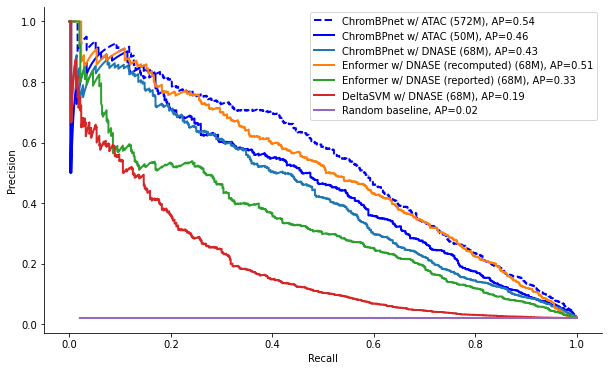

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


fig, ax = plt.subplots(figsize=(10,6))

######################################

keyd="pred.chrombpnet.encsr637xsc.varscore.crs"
label=dataf["var.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr637xsc_50m.varscore.crs"
label=dataf["var.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr000emt.varscore.crs"
label=dataf["var.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.enformer.encsr000emt.varscore.recomputed"
label=dataf["var.label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
enformer_auc_recomp = roc_auc

ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

# keyd="pred.enformer.encsr000emt.varscore.sad"
# label=dataf["var.label"].astype(int)
# score=abs(dataf[keyd])
# title="Enformer w/ DNASE SAD (50M)"

# fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
# roc_auc = metrics.average_precision_score(label, score)
# ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.enformer.encsr000emt.varscore.sar"
label=dataf["var.label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

keyd="pred.gkmsvm.encsr000emt.varscore.deltasvm"
label=dataf["var.label"].astype(int)
score=abs(dataf[keyd])
title="DeltaSVM w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
deltasvm_roc=roc_auc

roc_auc=sum(dataf["var.label"]==1)/len(dataf["var.label"])
ax.plot(fpr_chrombpnet, [sum(dataf["var.label"]==1)/len(dataf["var.label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.savefig("subfigs/dsqtls_auprc.pdf", transparent=True, dpi=300)

# AUPRC (best metric)

In [8]:
scores = []
labels = []
keys_df = []

keys = ['pred.chrombpnet.encsr637xsc.varscore.crs',
       'pred.chrombpnet.encsr637xsc.varscore.logfc_x_jsd',
       'pred.chrombpnet.encsr637xsc.varscore.jsd_x_aaq',
       'pred.chrombpnet.encsr637xsc.varscore.logfc_x_aaq',
       'pred.chrombpnet.encsr637xsc.varscore.jsd',     
       'pred.chrombpnet.encsr637xsc.varscore.logfc',
       'pred.chrombpnet.encsr637xsc.varscore.aaq']


key_shorts = ["CRS", 
              "logfc_x_jsd",
              "jsd_x_max_percentile",
              "logfc_x_max_percentile",
              "jsd",
              "logfc",
              "max_percentile"]

names = ["ATAC (572M)", "ATAC (50M)", "DNASE (50M)"]

j=0
for kd in keys:
    i = 0
    for title in ["encsr637xsc", "encsr637xsc_50m", "encsr000emt"]:
        label=data["var.label"].astype(int)
        score=abs(data[kd.replace("encsr637xsc", title)])
        roc_auc = metrics.average_precision_score(label, score)
        scores.append(roc_auc)
        labels.append(names[i])
        keys_df.append(key_shorts[j])
        i=i+1
    j=j+1

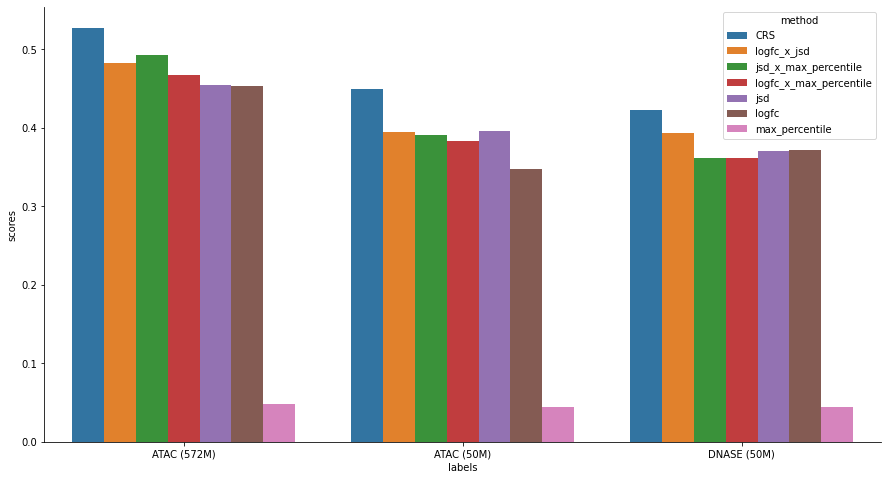

In [9]:
import seaborn as sns
dictt={"scores":scores, "labels":labels, "method":keys_df}
df = pd.DataFrame(dictt)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=df, x="labels", y="scores", hue="method", ax=ax)
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/dsqtls_auprc_score_compare.pdf", transparent=True, dpi=300)

In [10]:
dataf["var.label"].astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
28302   -1
28303   -1
28304   -1
28305   -1
28307   -1
Name: var.label, Length: 27373, dtype: int64

In [11]:
keyd="pred.chrombpnet.encsr000emt.varscore.crs"
score=dataf[keyd]

(array([2.6739e+04, 6.0000e+01, 8.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.90406164e-11, 2.06203065e-02, 4.12406129e-02, 6.18609193e-02,
        8.24812258e-02, 1.03101532e-01, 1.23721839e-01, 1.44342145e-01,
        1.64962451e-01, 1.85582758e-01, 2.06203064e-01]),
 <BarContainer object of 10 artists>)

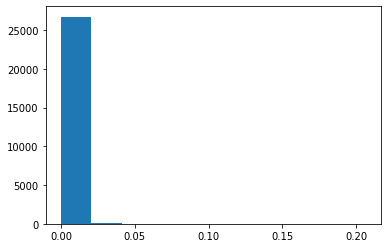

In [12]:
plt.hist(score[dataf["var.label"].astype(int)==-1])

In [13]:
sum(score[dataf["var.label"].astype(int)==-1]>0.025)

55

In [14]:
sum(score[dataf["var.label"].astype(int)==1]>0.025)

119

(array([456.,  63.,  21.,  11.,   4.,   1.,   2.,   1.,   0.,   1.]),
 array([1.07273470e-06, 2.82166130e-02, 5.64321533e-02, 8.46476936e-02,
        1.12863234e-01, 1.41078774e-01, 1.69294314e-01, 1.97509855e-01,
        2.25725395e-01, 2.53940935e-01, 2.82156476e-01]),
 <BarContainer object of 10 artists>)

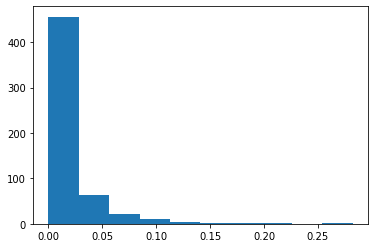

In [15]:
plt.hist(score[dataf["var.label"].astype(int)==1])

# AUPRC (subsampling)

In [16]:
def fetch_auprc_new(p):
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac[key_label], abs(merged_atac["abs_logfc_x_jsd_x_max_percentile.mean"]))
    roc_auc = metrics.average_precision_score(merged_atac[key_label], abs(merged_atac["abs_logfc_x_jsd_x_max_percentile.mean"]))
    #roc_auc = metrics.average_precision_score(merged_atac[key_label], abs(merged_atac["jsd.mean"]))
    print(roc_auc)
    return roc_auc

In [17]:
rocs = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
    
    roc_auc = metrics.average_precision_score(dataf["var.label"].astype(int), abs(dataf["pred.chrombpnet.encsr637xsc.varscore.crs".replace("encsr637xsc", title)]))
    print(roc_auc)
    rocs.append(roc_auc)

0.5382377424514815
0.5212720206135839
0.5130607361102206
0.4573954341174485
0.4172765936392213
0.289267529781573
0.42936897087849046


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


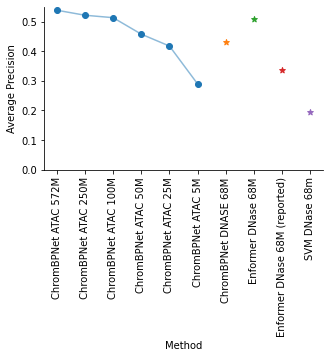

In [18]:
fix, ax = plt.subplots(figsize=(5,3))
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],rocs[0:-1])
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],rocs[0:-1], alpha=0.5)
ax.scatter(["DNASE\n68M"], [rocs[-1]], marker="*")
ax.scatter(["Enformer recomp"], [enformer_auc_recomp], marker="*")
ax.scatter(["Enformer"], [enformer_auc], marker="*")
ax.scatter(["DeltSVM"], [deltasvm_roc], marker="*")

xtix=["ChromBPNet ATAC 572M", " ChromBPNet ATAC 250M", "ChromBPNet ATAC 100M","ChromBPNet ATAC 50M", "ChromBPNet ATAC 25M", "ChromBPNet ATAC 5M"]+["ChromBPNet DNASE 68M"]+["Enformer DNase 68M"]+["Enformer DNase 68M (reported)"]+["SVM DNase 68m"]

ax.set_ylim((0,0.55))
ax.spines[["top", "right"]].set_visible(False)
ax.set_xticklabels(labels=xtix, rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("Average Precision")

plt.savefig("subfigs/dsqtls_auprc_subsampling.pdf", transparent=True, dpi=300)


# Pearsonr (benchmarking)

In [42]:

key_enf_1="pred.enformer.encsr000emt.varscore.recomputed"
key_enf_2="pred.enformer.encsr000emt.varscore.sar"
key_label="var.label"
obs_estimate="obs.estimate"
chrombpnet_logfc="pred.chrombpnet.encsr000emt.varscore.logfc"
chrombpnet_atac_logfc="pred.chrombpnet.encsr637xsc.varscore.logfc"
delta_svm_key="pred.gkmsvm.encsr000emt.varscore.deltasvm"
chrombpnet_atac_50m_logfc="pred.chrombpnet.encsr637xsc_50m.varscore.logfc"


# enformer_perf = np.max([scipy.stats.pearsonr(dataf[key_enf_1][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0],
#                        scipy.stats.pearsonr(dataf[key_enf_2][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]])
enformer_perf = scipy.stats.pearsonr(dataf[key_enf_1][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]
enformer_perf_old = scipy.stats.pearsonr(dataf[key_enf_2][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]

print(np.round(enformer_perf,2))

0.71


In [44]:
#enformer_perf = scipy.stats.pearsonr(abs(dataf[key_enf_1][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0]


In [45]:

#print(np.round(enformer_perf,2))

0.19


In [20]:
print(np.round(enformer_perf_old,2))

0.56


In [21]:
scipy.stats.pearsonr(dataf[key_enf_1][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])

(0.7124757538065036, 6.703532203865769e-88)

In [22]:
scipy.stats.pearsonr(dataf[key_enf_2][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])

(0.563128780419175, 3.625037841934576e-48)

In [23]:
scipy.stats.pearsonr(dataf[chrombpnet_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])


(0.7393262959574392, 6.552289684724055e-98)

In [24]:
scipy.stats.pearsonr(dataf[chrombpnet_atac_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])


(0.7586179164294138, 6.689376032748603e-106)

In [25]:
scipy.stats.pearsonr(dataf[delta_svm_key][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])


(0.7318756523100427, 5.1915505043409464e-95)

In [26]:

# enformer_perf_abs = np.max([scipy.stats.pearsonr(abs(dataf[key_enf_1][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0],
#                        scipy.stats.pearsonr(abs(dataf[key_enf_2][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0]])
enformer_perf_abs = scipy.stats.pearsonr(abs(dataf[key_enf_1][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0]
enformer_perf_abs_old = scipy.stats.pearsonr(abs(dataf[key_enf_2][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0]

print(np.round(enformer_perf_abs,2))
print(scipy.stats.pearsonr(abs(dataf[key_enf_2][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1])))



0.19
(0.029602416955412617, 0.4844839205202049)


In [27]:
print(np.round(enformer_perf_abs_old,2))


0.03


In [28]:
deltasvm_perf = scipy.stats.pearsonr(dataf[delta_svm_key][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]
print(np.round(deltasvm_perf,2))

0.73


In [29]:
deltasvm_perf_abs = scipy.stats.pearsonr(abs(dataf[delta_svm_key][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))
print(np.round(deltasvm_perf_abs[0],2))
print(deltasvm_perf_abs)

0.19
(0.19358920550964032, 3.937682048147411e-06)


In [30]:
chrombpnet_perf = scipy.stats.pearsonr(dataf[chrombpnet_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]
print(np.round(chrombpnet_perf,2))

0.74


In [31]:
chrombpnet_perf_abs = scipy.stats.pearsonr(abs(dataf[chrombpnet_logfc][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))
print(np.round(chrombpnet_perf_abs[0],2))
print(chrombpnet_perf_abs)

0.25
(0.24688242752352538, 3.19703213636387e-09)


In [32]:
chrombpnet_perf = scipy.stats.pearsonr(dataf[chrombpnet_atac_50m_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]
print(np.round(chrombpnet_perf,2))

0.73


In [33]:
chrombpnet_perf_abs = scipy.stats.pearsonr(abs(dataf[chrombpnet_atac_50m_logfc][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))
print(np.round(chrombpnet_perf_abs[0],2))
print(chrombpnet_perf_abs)

0.26
(0.2629603458940187, 2.608186148205023e-10)


In [34]:
scipy.stats.pearsonr(abs(dataf[chrombpnet_atac_logfc][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))


(0.29208596203522214, 1.7776064659066986e-12)

(560, 2)
(0.7586179164294138, 6.689376032748603e-106)


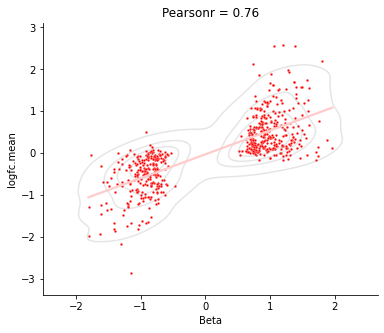

In [35]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

   
data = pd.DataFrame()
data["logfc.mean"] = dataf[dataf[key_label]==1][chrombpnet_atac_logfc]
data["Beta"] = dataf[dataf[key_label]==1][obs_estimate]

print(data.shape)
plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(dataf[chrombpnet_atac_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

plt.savefig("subfigs/dsqtls_pearsonr_plot.pdf", transparent=True, dpi=300)


# Pearsonr (subsampling)

In [36]:

pearsonrs_logfc_abs = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
  
    pear = scipy.stats.pearsonr(abs(dataf[obs_estimate][dataf[key_label]==1]), abs(dataf["pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title)][dataf[key_label]==1]))
    print(pear)
    pearsonrs_logfc_abs.append(pear[0])


(0.29208596203522214, 1.7776064659066986e-12)
(0.27736493794097455, 2.3813009032720084e-11)
(0.2816781946705184, 1.1309775172641475e-11)
(0.2629603458940187, 2.608186148205023e-10)
(0.22931197960366534, 4.072532181264645e-08)
(0.13358803525401117, 0.0015327079153868628)
(0.24688242752352538, 3.19703213636387e-09)


In [37]:
pearsonrs_logfc = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
 
    print("pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title))
    pear = scipy.stats.pearsonr(dataf[obs_estimate][dataf[key_label]==1], dataf["pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title)][dataf[key_label]==1])
    print(pear)
    pearsonrs_logfc.append(pear[0])

pred.chrombpnet.encsr637xsc.varscore.logfc
(0.7586179164294138, 6.689376032748603e-106)
pred.chrombpnet.encsr637xsc_250m.varscore.logfc
(0.7526282890600602, 2.4287034191876065e-103)
pred.chrombpnet.encsr637xsc_100m.varscore.logfc
(0.7546672458842387, 3.328306684572512e-104)
pred.chrombpnet.encsr637xsc_50m.varscore.logfc
(0.7346524058027831, 4.429888240845516e-96)
pred.chrombpnet.encsr637xsc_25m.varscore.logfc
(0.7203103315262882, 1.0646610243625364e-90)
pred.chrombpnet.encsr637xsc_5m.varscore.logfc
(0.6681759905958633, 1.0998664422228002e-73)
pred.chrombpnet.encsr000emt.varscore.logfc
(0.7393262959574392, 6.552289684724055e-98)


In [38]:

pearsonrs_jsd_abs = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
    
    print("pred.chrombpnet.encsr637xsc.varscore.js".replace("encsr637xsc", title))
    pear = scipy.stats.pearsonr(abs(dataf[obs_estimate][dataf[key_label]==1]), abs(dataf["pred.chrombpnet.encsr637xsc.varscore.jsd".replace("encsr637xsc", title)][dataf[key_label]==1]))
    print(pear)
    pearsonrs_jsd_abs.append(pear[0])


pred.chrombpnet.encsr637xsc.varscore.js
(0.3126615207076874, 3.6450264964081094e-14)
pred.chrombpnet.encsr637xsc_250m.varscore.js
(0.31167966683860004, 4.418936333384774e-14)
pred.chrombpnet.encsr637xsc_100m.varscore.js
(0.30728724129706153, 1.0365589041469113e-13)
pred.chrombpnet.encsr637xsc_50m.varscore.js
(0.29859614231417875, 5.372085406673485e-13)
pred.chrombpnet.encsr637xsc_25m.varscore.js
(0.2864012022361328, 4.930507413208403e-12)
pred.chrombpnet.encsr637xsc_5m.varscore.js
(0.250890979852558, 1.7392825202867793e-09)
pred.chrombpnet.encsr000emt.varscore.js
(0.31380363966877345, 2.911008818617905e-14)


In [39]:

pearsonrs_jsd = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
    pear = scipy.stats.pearsonr(dataf[obs_estimate][dataf[key_label]==1], dataf["pred.chrombpnet.encsr637xsc.varscore.jsd".replace("encsr637xsc", title)][dataf[key_label]==1])
    print(pear)
    pearsonrs_jsd.append(pear[0])


(0.7480524783614502, 1.959293501864504e-101)
(0.7523651296928697, 3.1344639726513044e-103)
(0.7470599652802675, 5.014684226524033e-101)
(0.736694138893397, 7.108672678159656e-97)
(0.7256926640794923, 1.1169288396490585e-92)
(0.6726748364294816, 5.1375454552778505e-75)
(0.7575962676005736, 1.8506194777967972e-105)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


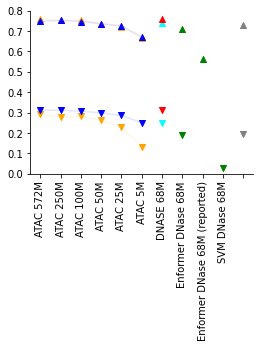

In [40]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_logfc[0:-1], c="orange", marker="^")
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_logfc[0:-1], alpha=0.1, c="orange")
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_jsd[0:-1], c="blue", marker="^")
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_jsd[0:-1], alpha=0.1, c="blue")

ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_logfc_abs[0:-1], c="orange", marker="v")
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_logfc_abs[0:-1], alpha=0.1,c="orange")
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_jsd_abs[0:-1], c="blue", marker="v")
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_jsd_abs[0:-1], alpha=0.1, c="blue" )


ax.scatter(["DNASE\n68M"], [pearsonrs_logfc[-1]],c="cyan",  marker="^")
ax.scatter(["DNASE\n68M"], [pearsonrs_jsd[-1]],c="red",  marker="^")
ax.scatter(["DNASE\n68M"], [pearsonrs_logfc_abs[-1]],c="cyan",  marker="v")
ax.scatter(["DNASE\n68M"], [pearsonrs_jsd_abs[-1]],c="red",  marker="v")

ax.scatter(["Enformer DNase\n68M"], [enformer_perf], c="green", marker="^")
ax.scatter(["Enformer DNase\n68M"], [enformer_perf_abs], c="green", marker="v")

ax.scatter(["Enformer DNase (reported)\n68M"], [enformer_perf_old], c="green", marker="^")
ax.scatter(["Enformer DNase (reported) \n68M"], [enformer_perf_abs_old], c="green", marker="v")


ax.scatter(["SVM DNase\n68M"], [deltasvm_perf], c="grey", marker="^")
ax.scatter(["SVM DNase\n68M"], [deltasvm_perf_abs[0]], c="grey",  marker="v")


xtix=["ATAC 572M", "ATAC 250M", "ATAC 100M","ATAC 50M", "ATAC 25M", "ATAC 5M"]+["DNASE 68M"]+["Enformer DNase 68M"]+["Enformer DNase 68M (reported)"]+["SVM DNase 68M"]
ax.set_ylim((0,0.8))
ax.spines[["top", "right"]].set_visible(False)
ax.set_xticklabels(labels=xtix, rotation=90)
plt.savefig("subfigs/dsqtls_subsample_pearsonr_performance.pdf", transparent=True, dpi=300)
